In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [71]:
data = pd.read_csv('/Users/sazid/Downloads/1.04.+Real-life+example.csv')
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [72]:
data.isnull().sum()
data = data.dropna()

In [73]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [97]:
data = pd.get_dummies(data, drop_first=True)
data

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7900.0,427,2.9,1999,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13300.0,358,5.0,2003,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23000.0,240,4.2,2007,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18300.0,120,2.0,2011,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4340,125000.0,9,3.0,2014,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4341,6500.0,1,3.5,1999,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4342,8000.0,194,2.0,1985,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
x = data.drop(['Price'], axis =1)
y = pd.DataFrame(np.log(data['Price']))


In [76]:
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
0,1.097173,-0.154921,-2.297262,2.299796,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
1,2.548105,0.027438,-1.102298,-0.434821,1.972472,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
2,1.880676,0.452941,-0.504817,-0.434821,1.972472,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
3,0.739277,0.290845,0.092665,-0.434821,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
4,-0.421468,-0.154921,0.690147,-0.434821,-0.506978,-0.287352,-0.352564,2.625292,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,-1.243663,-0.235969,1.138259,-0.434821,-0.506978,-0.287352,-0.352564,2.625292,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
4021,-1.495158,0.047700,1.138259,-0.434821,1.972472,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
4022,-1.572541,0.149010,-1.102298,2.299796,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267
4023,0.294325,-0.154921,-3.193485,2.299796,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,...,-0.2008,-0.052349,-0.054683,-0.168403,-0.04734,-0.096322,-0.03154,-0.05908,-0.015764,-0.035267


In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=1)

In [78]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [79]:
reg.score(x_train,y_train)

0.93926317641547

In [80]:
x1 = sm.add_constant(x_train)
x1= x1.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

model = sm.OLS(y_train,x1).fit()
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.5
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        13:51:23   Log-Likelihood:                 17.802
No. Observations:                3220   AIC:                             558.4
Df Residuals:                    2923   BIC:                             2363.
Df Model:                         296                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0706      0.007     -9.579      0.000      -0.085      -0.056
1             -0.0084      0.005     -1.686      0.092      -0.018       0.001
2              0.5846      0.009     67.306      0.000       0.568       0.602
3            1.13e+10   7.52e+10      0.150      0.881   -1.36e+11    1.59e+11
4           1.246e+10   8.29e+10      0.150      0.881    -1.5e+11    1.75e+11
5           7.123e+09   4.74e+10      0.150      0.881   -8.58e+10       1e+11
6            4.34e+10   2.89e+11      0.150      0.881   -5.23e+11     6.1e+11
7          -1.655e+11    1.1e+12     -0.150      0.881   -2.32e+12    1.99e+12
8           9.991e+10   6.65e+11      0.150      0.881    -1.2e+12     1.4e+12
9             -0.0002      0.012     -0.019      0.985      -0.024       0.023
10             0.0038      0.011      0.346      0.729      -0.018       0.025
11            -0.0593      0.019     -3.091      0.002      -0.097      -0.022
12            -0.0416      0.012     -3.555      0.000      -0.065      -0.019
13            -0.0230      0.015     -1.499      0.134      -0.053       0.007
14            -0.0292      0.006     -4.764      0.000      -0.041      -0.017
15            -0.0098      0.005     -1.981      0.048      -0.019   -9.77e-05
16            -0.0270      0.007     -3.885      0.000      -0.041      -0.013
17             0.2554      0.005     47.184      0.000       0.245       0.266
18          2.004e+09   1.33e+10      0.150      0.881   -2.41e+10    2.82e+10
19         -1.694e+09   1.13e+10     -0.150      0.881   -2.38e+10    2.04e+10
20             0.0266      0.008      3.149      0.002       0.010       0.043
21             0.0291      0.010      2.976      0.003       0.010       0.048
22            -0.0069      0.006     -1.228      0.219      -0.018       0.004
23         -2.396e+09   1.59e+10     -0.150      0.881   -3.37e+10    2.89e+10
24             0.0549      0.015      3.730      0.000       0.026       0.084
25             0.0468      0.013      3.632      0.000       0.022       0.072
26         -1.694e+09   1.13e+10     -0.150      0.881   -2.38e+10    2.04e+10
27             0.0178      0.010      1.809      0.071      -0.001       0.037
28             0.0286      0.008      3.554      0.000       0.013       0.044
29             0.0381      0.011      3.493      0.000       0.017       0.060
30         -2.934e+09   1.95e+10     -0.150      0.881   -4.12e+10    3.54e+10
31             0.0181      0.006      2.851      0.004       0.006       0.031
32         -4.296e+10   2.86e+11     -0.150      0.881   -6.04e+11    5.18e+11
33             0.0419      0.011      3.692      0.000       0.020       0.064
34             0.0925      0.022      4.200      0.000       0.049       0.136
35             0.1346      0.031      4.386      0.000       0.074       0.195
36

In [84]:
y_hat =pd.DataFrame( reg.predict(x_train))
x=pd.DataFrame()
x['Predict']= np.exp(y_hat)
x['Target'] = np.exp(y_train)
x['residual']= x['Target']-x['Predict']
x['%%']= abs((x['residual']*100)/x['Target'])
x.describe()

,Predict,Target,residual,%%
count,3220.000000,3220.000000,3220.000000,3220.000000
mean,18702.654670,19722.901860,1020.247191,16.667007
std,21238.030916,25867.553065,10362.909145,21.532011
min,981.097531,600.000000,-59376.909488,0.003583
25%,6968.899831,7000.000000,-1282.984322,5.293941
50%,11931.806402,11500.000000,6.871508,11.742470
75%,22408.864901,21999.000000,1212.524806,20.969351
max,262794.063670,300000.000000,233482.216671,449.903805


In [86]:
y_hat =pd.DataFrame( reg.predict(x_test))

y_hat = y_hat.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

x=pd.DataFrame()
x['Predict']= np.exp(y_hat)
x['Target'] = np.exp(y_test)
x['residual']= x['Target']-x['Predict']
x['%%']= abs((x['residual']*100)/x['Target'])
with pd.option_context('display.max_rows', None):
    display(x)

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,Predict,Target,residual,%%
0,9.130582e+03,9800.00,6.694176e+02,6.830791
1,3.139202e+04,38000.00,6.607977e+03,17.389414
2,1.555631e+04,14800.00,-7.563109e+02,5.110209
3,2.098447e+04,22500.00,1.515527e+03,6.735673
4,3.551758e+04,31990.00,-3.527585e+03,11.027149
5,3.998471e+04,47900.00,7.915289e+03,16.524611
6,1.878232e+03,2099.00,2.207685e+02,10.517793
7,9.735485e+03,12200.00,2.464515e+03,20.200944
8,1.337768e+04,13600.00,2.223220e+02,1.634721
9,5.809422e+03,6250.00,4.405782e+02,7.049251


In [87]:
x[np.isinf(x).any(axis=1)]

,Predict,Target,residual,%%
44,inf,42000.00,-inf,inf
172,inf,19500.00,-inf,inf
192,inf,35000.00,-inf,inf
285,inf,8500.00,-inf,inf
291,inf,20000.00,-inf,inf
293,inf,13321.33,-inf,inf
304,inf,1450.00,-inf,inf
307,inf,20500.00,-inf,inf
337,inf,29900.00,-inf,inf
345,inf,18800.00,-inf,inf


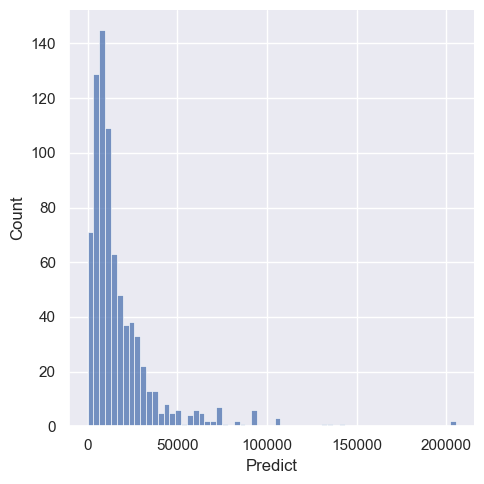

In [94]:
sns.displot(s_cleaned['Predict'])

In [93]:
np.isinf(x)
s_cleaned = x[~np.isinf(x)]
s_cleaned.describe()

,Predict,Target,residual,%%
count,790.000000,805.000000,790.000000,790.000000
mean,17774.574163,18869.932882,1095.203862,22.947427
std,20772.326583,25612.024860,12266.172783,87.654437
min,0.000000,600.000000,-70145.798263,0.017567
25%,6485.629147,6900.000000,-1392.764357,6.111850
50%,11149.535834,11200.000000,98.311458,13.617018
75%,21705.543244,20900.000000,1321.155149,23.767260
max,205164.501528,295000.000000,226679.987747,2346.013320


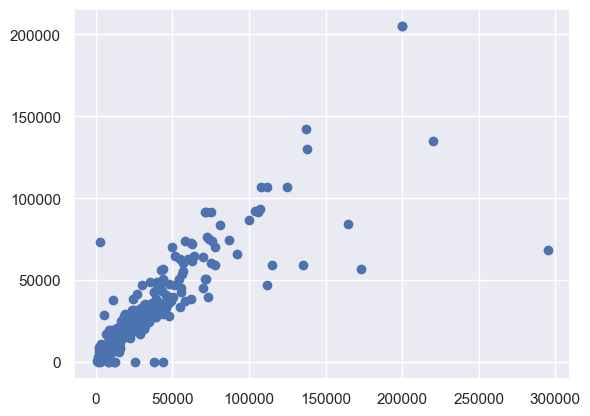

In [96]:
mat.scatter(s_cleaned['Target'],s_cleaned['Predict'])